In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/data_cleaning_task_dataset.csv")

# 1. Check missing values
print("Missing Value Count:")
print(df.isnull().sum())

# 2. Missing percentage (rounded to 1 decimal)
missing_percent = (df.isnull().mean() * 100).round(1)
print("\nMissing Percentage (%):")
print(missing_percent)

# 3. Drop rows missing more than 40% of data
df = df.dropna(thresh=df.shape[1] * 0.6)

# 4. Fill numeric missing values using mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 5. Fill categorical missing values using mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# 6. OPTIONAL: round numeric columns to 1 decimal everywhere
df = df.round(1)

# Save cleaned file
df.to_csv("cleaned_data_final.csv", index=False)

# Show first 5 rows
df.head()


Missing Value Count:
Customer_ID         0
Age                14
Gender              0
Annual_Income      14
Spending_Score     14
Purchase_Amount    14
dtype: int64

Missing Percentage (%):
Customer_ID        0.0
Age                7.0
Gender             0.0
Annual_Income      7.0
Spending_Score     7.0
Purchase_Amount    7.0
dtype: float64


,Customer_ID,Age,Gender,Annual_Income,Spending_Score,Purchase_Amount
0,1,63.0,Male,119847.0,47.3,3813.0
1,2,20.0,Male,145546.0,39.0,7601.0
2,3,46.0,Female,26309.0,80.0,4250.0
3,4,52.0,Female,60974.0,75.0,3366.0
4,5,56.0,Female,98449.0,25.0,5850.0


In [6]:
import pandas as pd
import numpy as np

# 1. Load dataset
df = pd.read_csv("/content/guaranteed_outlier_dataset.csv")

print("Original Shape:", df.shape)
display(df.head())

# 2. Choose numeric columns
num_cols = ["Annual_Income", "Purchase_Amount"]

# 3. Calculate IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nQ1 values:\n", Q1)
print("\nQ3 values:\n", Q3)
print("\nIQR:\n", IQR)

# 4. Condition to identify outliers
outlier_condition = (
    (df[num_cols] < (Q1 - 1.5 * IQR)) |
    (df[num_cols] > (Q3 + 1.5 * IQR))
)

# 5. Show outlier rows
outliers = df[outlier_condition.any(axis=1)]
print("\nOutliers Found:", outliers.shape[0])
display(outliers)

# 6. Remove outliers
df_no_outliers = df[~outlier_condition.any(axis=1)]

print("\nShape After Removing Outliers:", df_no_outliers.shape)
display(df_no_outliers.head())

# 7. Save cleaned file
df_no_outliers.to_csv("cleaned_outlier_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_outlier_data.csv'")


Original Shape: (200, 4)


,Customer_ID,Age,Annual_Income,Purchase_Amount
0,1,52,52483,3107
1,2,18,49308,3168
2,3,38,53238,3324
3,4,23,57615,3316
4,5,45,48829,2586



Q1 values:
 Annual_Income      46473.75
Purchase_Amount     2819.75
Name: 0.25, dtype: float64

Q3 values:
 Annual_Income      52767.50
Purchase_Amount     3228.25
Name: 0.75, dtype: float64

IQR:
 Annual_Income      6293.75
Purchase_Amount     408.50
dtype: float64

Outliers Found: 12


,Customer_ID,Age,Annual_Income,Purchase_Amount
5,6,34,200000,2718
9,10,55,52712,4155
10,11,20,47682,15000
25,26,21,250000,3326
50,51,19,300000,2621
60,61,44,47604,18000
62,63,55,44468,2027
74,75,27,36901,2705
113,114,22,62316,3244
120,121,43,400000,3029



Shape After Removing Outliers: (188, 4)


,Customer_ID,Age,Annual_Income,Purchase_Amount
0,1,52,52483,3107
1,2,18,49308,3168
2,3,38,53238,3324
3,4,23,57615,3316
4,5,45,48829,2586



Cleaned dataset saved as 'cleaned_outlier_data.csv'


Dataset Preview:


,Customer_ID,Annual_Income,Purchase_Amount
0,1,51314,2917
1,2,67978,3099
2,3,62263,4213
3,4,47949,2741
4,5,55371,2765


R² Score: 0.3653640889907278


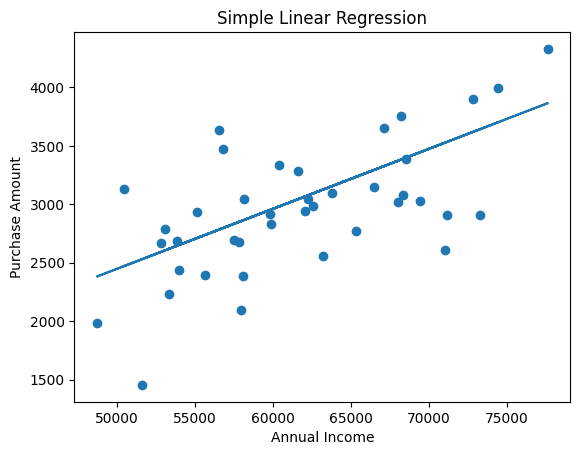

Prediction file saved as regression_predictions.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("/content/regression_dataset.csv")

print("Dataset Preview:")
display(df.head())

# 2. Select Feature and Target
X = df[["Annual_Income"]]
y = df["Purchase_Amount"]

# 3. Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Create & Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluate Model
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# 7. Plot Regression Line
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Annual Income")
plt.ylabel("Purchase Amount")
plt.title("Simple Linear Regression")
plt.show()

# 8. Save predictions
output = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
output.to_csv("regression_predictions.csv", index=False)

print("Prediction file saved as regression_predictions.csv")
